# Data Wrangling Project - WeRateDogs

## Table of contents

### [1 Data Wrangling](#wrangling)
#### [1.1 Gathering Data](#gathering)
#### [1.2 Assessing Data](#assessing)
##### [1.2.1 Visual Assessment](#visual)
##### [1.2.2 Programmatic Assessment](#program)<br>
#### [1.3 Cleaning Data](#cleaning)
#### [1.4 Storing Data](#storing)<br>
### [2 Data Analyses](#analyses)<br>

### [3 Data Visualisation](#visualisation)<br>

#### [Resources](#resources)<br><br><br>



<a id='wrangling'></a>
### 1 Data Wrangling
<a id='gathering'></a>
#### 1.1 Gathering Data

The data for this project comes from three different sources.
One source is a twitter archive stored in a csv file.
The second are image predictions which can be uploaded from a website.
The last source is additional data from Twitter which can be retrieved via the<br>
Twitter API using tweety.

In [35]:
#import necessarry packages
import pandas as pd
import numpy as np
import requests as rqs
import tweepy as twy # pip install tweepy
import json as json
import os


#### Source 1 - Twitter Archive - CSV

In [333]:
# first data source
#get twitter archive
df_arch = pd.read_csv('twitter-archive-enhanced.csv')

#### Source 2 - Image predictions - TSV

In [44]:
# second data source
#get image predictions

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rqs.get(url)


In [26]:
#create folder
folder_name = 'dogs'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [30]:
# save the file - name it as in the url
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [334]:
# check if data has been gathered
df_image = pd.read_csv('dogs/image-predictions.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Source 3 - Twitter API - JSON

In [39]:
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'secret'
consumer_secret = 'secret'
access_token = 'secret'
access_secret = 'secret'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = twy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_arch.tweet_id.values
len(tweet_ids)

2356

In [41]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except twy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [335]:
# Write JSON file to dataframe
# Code retrieved from: https://knowledge.udacity.com/questions/28389
df_tweet = pd.DataFrame(columns=['tweet_id', 'id_int','retweet_count', 'favorite_count'])
with open('tweet-json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        id_int = status['id']                         
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_tweet = df_tweet.append(pd.DataFrame([[tweet_id, id_int, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'id_int','retweet_count', 'favorite_count']))
df_tweet = df_tweet.reset_index(drop=True)


In [80]:
# check if data has been gathered
df_tweet.head()

,tweet_id,id_int,retweet_count,favorite_count
0,892420643555336193,892420643555336193,8853,39467
1,892177421306343426,892177421306343426,6514,33819
2,891815181378084864,891815181378084864,4328,25461
3,891689557279858688,891689557279858688,8964,42908
4,891327558926688256,891327558926688256,9774,41048


<a id='assessing'></a>
### 1.2 Assessing Data
I will assess each dataframe, in the end I want to merge all to one dataframe, with all rows containing data that is needed.

<a id='visual'></a>
#### Visual assessment
Easiest method is to display part of the tables using .head() function.Let's do that first for all 3 tables.

In [392]:
# display first 5 rows of archive data
df_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Finding
At first glance there are columns with NaN values,as I am not familiar with the meaning of all the columns, I will need to find out if this is an issue. Secondly it shows that not all tweets have a "stage" attched to them (doggo, floofer etc.).
Timestamp has +0000 after the date and time, to be investigated if that causes any issues.

To get familiar with the data I searched in the Twitter developer environment for information. This link:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html provides useful information which helps to get acquainted with the dataset. From that information I conclude that it is perfectly fine to have NaN values in certain columns. As this has to do with the fact if it is a retweet or reply, which of course is not the case for all tweets.

In [393]:
# display first 5 rows of image data
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Finding
I do not see anything notable based on the first 5 rows. The columns are described in the project overview, so no questions here based on the visual assessment. 

In [394]:
# display first 5 rows of tweet data
df_tweet.head(5)

,tweet_id,id_int,retweet_count,favorite_count
0,892420643555336193,892420643555336193,8853,39467
1,892177421306343426,892177421306343426,6514,33819
2,891815181378084864,891815181378084864,4328,25461
3,891689557279858688,891689557279858688,8964,42908
4,891327558926688256,891327558926688256,9774,41048


#### Finding
No strange elements based on the first 5 rows. The columns are described in the project overview, so no questions here based on the visual assessment. before mentioned web page: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html.

<a id='program'></a>
#### Programmatic assessment
Now let's see if by using code more irregulairties are visible in the data

In [336]:
# checking archive data
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Findings:

#### Tidiness

- Columns with dog "stage" (doggo, floofer, pupper, puppo) should be merged to one column
- Retweets should be removed (181 rows, as can be derived from retweed_status_id), as this is a copy of the original tweet

#### Quality
- All columns with an ID should be strings in stead of floats and integers. 
- Time stamp must be converted to date.
- Completeness/correctness of rating and stage should be checked and cleaned

In [337]:
# Checking image data
df_image = pd.read_csv('dogs/image-predictions.tsv', sep='\t')
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Findings:

#### Quality
- Less entries than archive data, so we need to check which Tweets exist in all 3 data sources. 
- tweet id and img number should be strings
- Only P1 data will be used, so other columns can be discarded


In [338]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
id_int            2354 non-null object
retweet_count     2354 non-null object
favorite_count    2354 non-null object
dtypes: object(4)
memory usage: 73.6+ KB


### Findings:

#### Quality
- Check if all tweet_ids are the same in all dataframes (as said before)
- remove id_int if not used


<a id='cleaning'></a>
### 1.3 Cleaning Data

#### Define<br>
All findings as described above will be cleaned.

#### Archive Data:
- All columns with an ID should be strings in stead of floats and integers. 
- Time stamp must be converted to date.
- Columns with dog "stage" (doggo, floofer, pupper, puppo) should be merged to one column
- Tweets with multiple "stages" in one should be removed
- Retweets should be removed (181 rows, as can be derived from retweed_status_id)
- Completeness/correctness of rating and stage should be checked and cleaned

#### Image Data:
- Less entries than archive data, so we need to check which Tweets exist in all 3 data sources. 
- tweet id and img number should be strings
- Only P1 data will be used, so other columns can be discarded

#### Tweet Data:
- Check if all tweet_ids are the same in all dataframes (as said before)
- remove id_int if not used


#### Code

In [516]:
#first make a copies of the dataframes
dfa_clean = df_arch.copy()
dfi_clean = df_image.copy()
dft_clean = df_tweet.copy()

### Archive data cleaning

In [517]:
# Remove all retweets

# Remove all rows with data in column retweeted_status_id
# Check: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html for all definitions of columns
dfa_clean = dfa_clean[dfa_clean.retweeted_status_id.isna()]


In [518]:
# Remove retweeted columns

# As columns starting with retweeted do not contain data anymore, they can be removed
# Code source: 
# https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
dfa_clean.drop(list(dfa_clean.filter(regex = 'retweeted')), axis = 1, inplace = True)


In [519]:
# Set tweet_id to string format

dfa_clean.tweet_id = dfa_clean.tweet_id.astype(str)

### Stage names
The following section will deal with retrieving stage names from the tweet text.<br>
As described in the project notes the earlier extraction visible in columns <br>
doggo, floofer, puppo and pupper was not performed well. I will check and redo the extraction.

In [520]:
# Create column with only lower cases for the tweet to simplify searching
dfa_clean['text_lower'] = dfa_clean['text'].str.lower()

In [521]:
# Extract stage names from tweet text, to check if this does a better job than now 
# available in the dataset
# Code Source:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

dfa_clean['doggo2'] = dfa_clean.text_lower.str.extract(r'(?P<doggo2>doggo)')
dfa_clean['floofer2'] = dfa_clean.text_lower.str.extract(r'(?P<floofer2>floofer)')
dfa_clean['pupper2'] = dfa_clean.text_lower.str.extract(r'(?P<pupper2>pupper)')
dfa_clean['puppo2'] = dfa_clean.text_lower.str.extract(r'(?P<puppo2>puppo)')

In [522]:
# print the values per column to check for differences between old and new version
print(dfa_clean['doggo'].value_counts())
print()
print(dfa_clean['doggo2'].value_counts())
print()
print(dfa_clean['floofer'].value_counts())
print()
print(dfa_clean['floofer2'].value_counts())
print()
print(dfa_clean['pupper'].value_counts())
print()
print(dfa_clean['pupper2'].value_counts())
print()
print(dfa_clean['puppo'].value_counts())
print()
print(dfa_clean['puppo2'].value_counts())

None     2088
doggo      87
Name: doggo, dtype: int64

doggo    95
Name: doggo2, dtype: int64

None       2165
floofer      10
Name: floofer, dtype: int64

floofer    10
Name: floofer2, dtype: int64

None      1941
pupper     234
Name: pupper, dtype: int64

pupper    260
Name: pupper2, dtype: int64

None     2150
puppo      25
Name: puppo, dtype: int64

puppo    33
Name: puppo2, dtype: int64


#### Finding
In almost all cases (except for floofer) the new method brings in more hits on stage names,<br>
I will use the new method from now on and will drop the old columns.

In [523]:
# dropping old stage columns and directly dropping in_reply_to_columns as these will not be used
dfa_clean.drop(['doggo', 'floofer', 'puppo', 'pupper',
                'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace = True)
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
text_lower            2175 non-null object
doggo2                95 non-null object
floofer2              10 non-null object
pupper2               260 non-null object
puppo2                33 non-null object
dtypes: int64(2), object(11)
memory usage: 237.9+ KB


In [524]:
# replace all nan in stage columns with None
# Source code:
# https://stackoverflow.com/questions/36556256/how-do-i-fill-na-values-in-multiple-columns-in-pandas

cols = ['doggo2', 'floofer2', 'pupper2', 'puppo2']
dfa_clean[cols]=dfa_clean[cols].fillna("None")


In [525]:
# add all categories to one column
# Source code:
# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
dfa_clean['stage'] = dfa_clean['doggo2'].str.cat(dfa_clean[['floofer2', 'pupper2', 'puppo2']])

#replace 4xNone no_rank
dfa_clean['stage'].replace('NoneNoneNoneNone', 'no_rank', inplace = True)

#remove None from fields with rank
dfa_clean['stage'].replace('None', '',regex = True, inplace = True)

#Check stages
print(dfa_clean.stage.value_counts())


no_rank         1790
pupper           250
doggo             82
puppo             31
doggopupper       10
floofer            9
doggopuppo         2
doggofloofer       1
Name: stage, dtype: int64


In [526]:
#replace multiple stage names with 'multiple'
dfa_clean['stage'].replace('doggopupper', 'multiple',regex = True, inplace = True)
dfa_clean['stage'].replace('doggopuppo', 'multiple',regex = True, inplace = True)
dfa_clean['stage'].replace('doggofloofer', 'multiple',regex = True, inplace = True)


In [527]:
#Check stages
print(dfa_clean.stage.value_counts())

no_rank     1790
pupper       250
doggo         82
puppo         31
multiple      13
floofer        9
Name: stage, dtype: int64


### Ratings
The following section will deal with retrieving ratings from the tweet text.<br>
As described in the project notes the earlier extraction visible in columns <br>
rating_numerator and rating_denominator was not performed well. I will check and redo the extraction.

In [528]:
# Check if there are ratings with decimals and if this is properly shown in column rating_numerator
# Source code: reviewer Udacity
dfa_clean[dfa_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [529]:
# Extract stage names from tweet text, to check if this does a better job than now 
# available in the dataset
# Code Source:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html

# Extract ratings without decimals
dfa_clean['rating'] = dfa_clean.text_lower.str.extract(r'(?P<rating>[0-9]{2}\/[0-9]{2})')
# Extract ratings with decimals
dfa_clean['rating_decimal'] = dfa_clean.text_lower.str.extract(r"(\d+\.\d*\/\d+)")


In [530]:
# Merge rating column with rating_decimal column
# Code source:
# https://stackoverflow.com/questions/41449555/pandas-combine-two-columns-with-null-values
dfa_clean['rating_decimal'].fillna(dfa_clean['rating'], inplace = True)

In [531]:
dfa_clean['rating_decimal'].value_counts()

12/10       500
10/10       444
11/10       426
13/10       309
14/10        44
20/10         2
60/50         1
43/13         1
11.27/10      1
80/80         1
17/10         1
50/50         1
99/90         1
11.26/10      1
65/15         1
13.5/10       1
76/10         1
04/17         1
44/12         1
45/50         1
11/15         1
82/10         1
15/10         1
66/10         1
9.75/10       1
07/10         1
84/70         1
20/16         1
21/11         1
44/40         1
88/80         1
60/00         1
9.5/10        1
Name: rating_decimal, dtype: int64

In [532]:
# drop column rating as it is now abundant
dfa_clean.drop('rating', axis = 1, inplace = True)

In [533]:
# rename column rating_decimal to rating
dfa_clean.rename(columns={"rating_decimal": "rating"}, inplace = True)

In [534]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
text_lower            2175 non-null object
doggo2                2175 non-null object
floofer2              2175 non-null object
pupper2               2175 non-null object
puppo2                2175 non-null object
stage                 2175 non-null object
rating                1752 non-null object
dtypes: int64(2), object(13)
memory usage: 271.9+ KB


#### Finding
Most cases have a rating which is normal for weratedogs, namely
Starting with denominator 10 and a numerator 10 or up. I will
remove all rows which do not comply with this 'rule'.

In [535]:
# Split column rating into 2 columns
# Code source:
# https://stackoverflow.com/questions/37333299/splitting-a-column-by-delimiter-pandas-python

dfa_clean[['rating','denominator2']] = dfa_clean['rating'].str.split('/',expand=True)


In [536]:
# Replace nan with no_rating for columns rating & denominator2 
cols = ['rating', 'denominator2']
dfa_clean[cols]=dfa_clean[cols].fillna(0)
dfa_clean['denominator2'].value_counts()

# Set rating and denominator2 to float and int format

dfa_clean.rating = dfa_clean.rating.astype(float)
dfa_clean.denominator2 = dfa_clean.denominator2.astype(int)

In [537]:
#remove all denominators not equal to 10 or 0
dfa_clean = dfa_clean[(dfa_clean.denominator2 == 0)| (dfa_clean.denominator2 == 10)] 
dfa_clean['denominator2'].value_counts()

10    1736
0      424
Name: denominator2, dtype: int64

In [538]:
#remove all numerators lower than 10 but keeping 0
dfa_clean = dfa_clean[(dfa_clean.rating == 0)| (dfa_clean.rating >= 10)]
#remove all outliers eg greater than 20
dfa_clean = dfa_clean[(dfa_clean.rating < 20)]
dfa_clean['rating'].value_counts()

12.00    500
10.00    444
11.00    426
0.00     423
13.00    309
14.00     44
11.27      1
11.26      1
15.00      1
17.00      1
13.50      1
Name: rating, dtype: int64

In [539]:
#remove columns rating_numerator and rating_denominator

dfa_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1, inplace = True)

In [540]:
#rename column denominator2 to denominator
dfa_clean.rename(index=str, columns={'denominator2':'denominator'}, inplace=True) 


In [541]:
# convert column to date time
dfa_clean['timestamp'] = pd.to_datetime(dfa_clean['timestamp'])

In [542]:
dfa_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2151 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id         2151 non-null object
timestamp        2151 non-null datetime64[ns, UTC]
source           2151 non-null object
text             2151 non-null object
expanded_urls    2101 non-null object
name             2151 non-null object
text_lower       2151 non-null object
doggo2           2151 non-null object
floofer2         2151 non-null object
pupper2          2151 non-null object
puppo2           2151 non-null object
stage            2151 non-null object
rating           2151 non-null float64
denominator      2151 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(11)
memory usage: 252.1+ KB


### Image data cleaning
Only items that I want to clean is tweet_id to string <br>
and removing all p2 and p3 columns as we will focus on p1 only.

In [543]:
# Removing columns startying with p2 and p3
# Code source: 
# https://stackoverflow.com/questions/19071199/drop-columns-whose-name-contains-a-specific-string-from-pandas-dataframe
dfi_clean.drop(list(dfi_clean.filter(regex = 'p2')), axis = 1, inplace = True)
dfi_clean.drop(list(dfi_clean.filter(regex = 'p3')), axis = 1, inplace = True)


In [544]:
# convert tweet_id to string
dfi_clean = dfi_clean.astype({"tweet_id": str})

### Twitter data cleaning
Only items that I want to clean is removing column id_int and set columns retweet_count and <br>
favorite_count to integer.

In [545]:
# remove column id_int
dft_clean.drop('id_int', axis=1, inplace = True)


In [546]:
dft_clean = dft_clean.astype({"retweet_count": int})
dft_clean = dft_clean.astype({"favorite_count": int})

#### Test
Check if all dataframes are sufficiently cleaned

In [547]:
dfa_clean.info()
print()
dfi_clean.info()
print()
dft_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2151 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id         2151 non-null object
timestamp        2151 non-null datetime64[ns, UTC]
source           2151 non-null object
text             2151 non-null object
expanded_urls    2101 non-null object
name             2151 non-null object
text_lower       2151 non-null object
doggo2           2151 non-null object
floofer2         2151 non-null object
pupper2          2151 non-null object
puppo2           2151 non-null object
stage            2151 non-null object
rating           2151 non-null float64
denominator      2151 non-null int64
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(11)
memory usage: 252.1+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null 

<a id='storing'></a>
### 1.4 Storing Data
The above shown data, looks to be the data set we need.<br>
First I will merge the 3 dataframes into one and then store it as csv.

In [548]:
# Merge dfa_clean with dfi_clean
dfa_total = pd.merge(dfa_clean, dfi_clean, how='inner', on='tweet_id')
# Merge dfa_total with dft_clean
dfa_total = pd.merge(dfa_total, dft_clean, how='inner', on='tweet_id')

In [549]:
dfa_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 1977
Data columns (total 21 columns):
tweet_id          1978 non-null object
timestamp         1978 non-null datetime64[ns, UTC]
source            1978 non-null object
text              1978 non-null object
expanded_urls     1978 non-null object
name              1978 non-null object
text_lower        1978 non-null object
doggo2            1978 non-null object
floofer2          1978 non-null object
pupper2           1978 non-null object
puppo2            1978 non-null object
stage             1978 non-null object
rating            1978 non-null float64
denominator       1978 non-null int64
jpg_url           1978 non-null object
img_num           1978 non-null int64
p1                1978 non-null object
p1_conf           1978 non-null float64
p1_dog            1978 non-null bool
retweet_count     1978 non-null int64
favorite_count    1978 non-null int64
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(4), ob

In [550]:
# writing the dataframe to csv
dfa_total.to_csv('we_rate_dogs_data.csv', index = False)

<a id='analyses'></a>
### 2 Data Analyses

I will check which element has the highest correlation with rating.<br>
In other words does a higher rating, trigger more retweets, or favorites?<br>
Or are the owners of a certain breed of dog more likely to give higher ratings?<br>
This test will only be performed on tweets with a rating, so tweets without rating<br>
will be discarded.

In [551]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


In [552]:
# read in the wrangled data
dfa_total = pd.read_csv('we_rate_dogs_data.csv')
# create a dataframe with ratings
dfb = dfa_total.query('rating > 0')

In [553]:
dfb['intercept'] = 1
lm = sm.OLS(dfb['rating'], dfb[['intercept', 'favorite_count']])
results = lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     493.1
Date:                Fri, 12 Apr 2019   Prob (F-statistic):           3.24e-95
Time:                        09:42:58   Log-Likelihood:                -2191.6
No. Observations:                1570   AIC:                             4387.
Df Residuals:                    1568   BIC:                             4398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         10.9854      0.032    347.477      0.000      10.923      11.047
favorite_count  4.156e-05   1.87e-06     22.206      0.000    3.79e-05    4.52e-05
==============================================================================
Omnibus:                       21.926   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.553
Skew:                           0.095   Prob(JB):                     0.000691
Kurtosis:                       2.568   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With a correlation coefficient (r) of 0.238 there seems to be no correlation between<br>
Rating and favorite count. Let's check the data visualy, without discarding the non rated tweets.

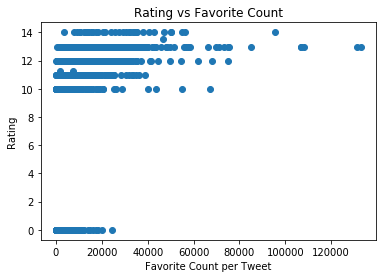

In [554]:
plt.scatter(dfa_total['favorite_count'], dfa_total['rating'])
plt.title("Rating vs Favorite Count")
plt.xlabel("Favorite Count per Tweet")
plt.ylabel("Rating")
plt.savefig("rating_vs_favorite");

An interesting observation, is that all tweets receive around 20 thousand <br>
favorites, regardless if there is a rating, or not. Lets check for correlation<br>
if we look at the data set with favorite count above 20 thousand.

In [555]:
# proportion of dogs with no rating
dfa_clean.query('rating == 0').count()[0]/dfa_clean.count()[0]


0.19665271966527198

In [556]:
# create a dataframe with ratings and fovorite count above 20 thousand
dfc = dfb.query('favorite_count > 20000')

In [557]:
dfc['intercept'] = 1
lm = sm.OLS(dfc['rating'], dfc[['intercept', 'favorite_count']])
results = lm.fit()
results.summary()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.925
Date:                Fri, 12 Apr 2019   Prob (F-statistic):            0.00309
Time:                        09:43:04   Log-Likelihood:                -332.16
No. Observations:                 258   AIC:                             668.3
Df Residuals:                     256   BIC:                             675.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         12.1825      0.119    102.371      0.000      11.948      12.417
favorite_count  9.419e-06   3.15e-06      2.987      0.003    3.21e-06    1.56e-05
==============================================================================
Omnibus:                       25.942   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.448
Skew:                          -0.751   Prob(JB):                     1.48e-07
Kurtosis:                       3.817   Cond. No.                     8.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

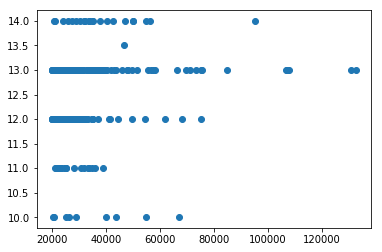

In [558]:
plt.scatter(dfc['favorite_count'], dfc['rating']);

This correlation is even smaller. However what was visible in the previous plot, is <br>
that by having a rating this will increase the chance of more than 20 thousand favorite counts. Let's check if that <br>
is the case.

In [559]:
# Create a new column 'rated_tweet'
# Code source:
# https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition

dfa_total.loc[dfa_total['rating'] == 0, 'rated_tweet'] = 'not_rated'
dfa_total.loc[dfa_total['rating'] != 0, 'rated_tweet'] = 'rated'

In [560]:
type_dummies = pd.get_dummies(dfa_total['rated_tweet'])
dfa_total = dfa_total.join(type_dummies)


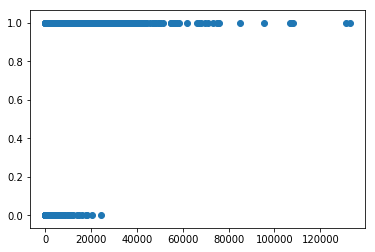

In [561]:
plt.scatter(dfa_total['favorite_count'], dfa_total['rated']);

It is obvious from the above plot that, in order to receive more than 20 thousand<br>
favorites, a rating is necessary.

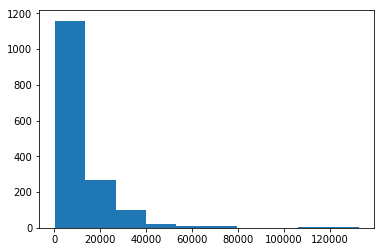

In [562]:
dfd = dfa_total.query('rated == 1')
plt.hist(dfd['favorite_count']);

In [563]:
# Compare the chance of 20,000 plus favorites rated vs non-rated tweets
nr_fav = dfa_total.query('favorite_count > 20000').shape[0]
total_tweets = dfa_total.shape[0]
total_rated = dfa_total.query('rated == 1').shape[0]
total_not_rated = total_tweets - total_rated
total_rated_above = dfa_total[(dfa_total.rated == 1) & (dfa_total.favorite_count > 20000)].shape[0]
total_not_rated_above = nr_fav - total_rated_above

print("There is a",round(nr_fav/total_rated_above,0),"% chance that you will receive more than 20.000 favorites if the tweet is rated.")
print("Although this seems like a small chance, it is",int(total_rated_above/total_not_rated_above),"times more than if the tweet has no rating.")


There is a 1.0 % chance that you will receive more than 20.000 favorites if the tweet is rated.
Although this seems like a small chance, it is 129 times more than if the tweet has no rating.


Now, let's take a closer look at the dog breed's using the P1 column.<br>
We will treat the P1 column as fully correct for this excersice, although
there are dog breeds named: "african crocodile" and "website"

In [564]:
# Top 10 dog breeds by total favorite count
dfa_total.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10)

p1
golden_retriever      1692196
Labrador_retriever    1111859
Pembroke               994755
Chihuahua              676441
Samoyed                542991
French_bulldog         465738
chow                   404241
pug                    320223
cocker_spaniel         315825
Pomeranian             278818
Name: favorite_count, dtype: int64

In [565]:
# Top 10 dog breeds by average favorite count
dfa_total.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(30)

p1
laptop            55098.000000
limousine         46959.000000
orange            39467.000000
Arabian_camel     38300.000000
Angora            37892.500000
prison            35669.000000
revolver          35553.000000
barbell           35325.000000
basketball        35324.000000
upright           35178.000000
bubble            34349.000000
quilt             33689.000000
pole              33651.000000
fountain          32617.000000
remote_control    30653.000000
conch             28519.000000
gondola           27899.000000
beaver            26068.000000
hippopotamus      25191.000000
paper_towel       24490.000000
padlock           24192.000000
Saluki            24060.000000
convertible       22798.000000
home_theater      22756.200000
school_bus        21979.000000
marmot            21477.000000
mortarboard       21029.000000
swing             20087.285714
comic_book        19278.000000
lakeside          19154.000000
Name: favorite_count, dtype: float64

There seems to be a lot of noise in the data, let's check which breeds there are.


In [566]:
dfa_total['p1'].value_counts()

golden_retriever             137
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Staffordshire_bullterrier     19
Siberian_husky                19
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
beagle                        17
teddy                         17
Cardigan                      17
Italian_greyhound             16
Lakeland_terrier              16
kuvasz                        16
web_site                      15
          

373 breeds and scrolling trough the bottom of the list, these do not seem to be dog breeds.
To short cut trying to get all real dog breeds, I pick the most listed dog breeds, with a count above 15.
Then I will remove breed 'seat-belt' as last step.

In [567]:
# Dropping the rows with breeds that occur les than 16 times
# Code source:
# https://stackoverflow.com/questions/34913546/remove-low-counts-from-pandas-data-frame-column-on-condition

breed_count = dfa_total['p1'].value_counts()
dfa_total = dfa_total[dfa_total.isin(breed_count.index[breed_count > 15]).values]
dfa_total = dfa_total.query('p1 != "seat_belt"')

In [568]:
dfa_total.p1.value_counts()

golden_retriever             137
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
German_shepherd               20
Siberian_husky                19
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
Rottweiler                    17
Cardigan                      17
teddy                         17
Shih-Tzu                      17
beagle                        17
Italian_greyhound             16
Lakeland_terrier              16
kuvasz                        16
Name: p1, dtype: int64

In [569]:
# Top 10 dog breeds by average favorite count
dfa_total.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(10)

p1
French_bulldog        17913.000000
Cardigan              15311.000000
Samoyed               13574.775000
Lakeland_terrier      12955.750000
golden_retriever      12351.795620
Labrador_retriever    12085.423913
Eskimo_dog            12001.555556
cocker_spaniel        11697.222222
Pembroke              11304.034091
German_shepherd       10154.650000
Name: favorite_count, dtype: float64

<a id='visualisation'></a>
### 3 Data Visualisation

After all the wrangling and analyses lte's end with 2 visuals which show the popluarity of certain breed of dogs <br>
on weratedogs.

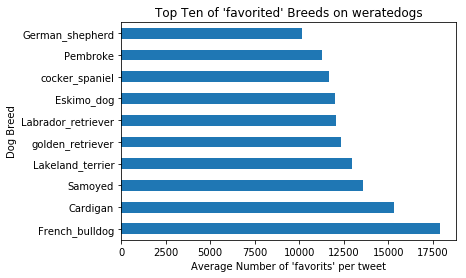

In [570]:
# Create a bar chart which shows average number of favorites per dog breed top 10 only

top_breeds = dfa_total.groupby('p1')['favorite_count'].mean()
top_ten_breeds = top_breeds.sort_values(ascending=False)[:10]
toptenbreeds = top_ten_breeds.plot(kind='barh', title = "Top Ten of 'favorited' Breeds on weratedogs")

# label x and y axis
# Code source:
# https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

toptenbreeds.set_xlabel("Average Number of 'favorits' per tweet")
toptenbreeds.set_ylabel("Dog Breed")
topten.figure.savefig("breed_fav.png"); #Code source: https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror/33617056;

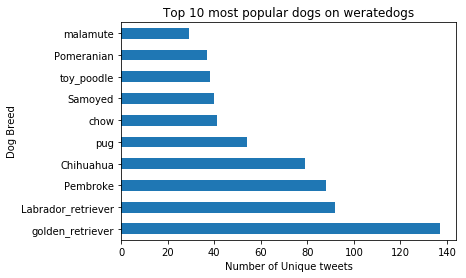

In [571]:
# Create chart with top 10 dog breeds based on number of unique tweets
dfa = dfa_total
top_ten = dfa_total.p1.value_counts()[:10]
topten = top_ten.plot(kind='barh', title = "Top 10 most popular dogs on weratedogs", legend = False)

# label x and y axis
# Code source:
# https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot

topten.set_xlabel("Number of Unique tweets")
topten.set_ylabel("Dog Breed")
topten.figure.savefig("breed_tweets.png"); #Code source: https://stackoverflow.com/questions/33616557/barplot-savefig-returning-an-attributeerror/33617056

Interesting to see that people tend to like (favorite) the French Bulldog by far the most.
But it is not a dog that is even in the Top 10 of the most tweeted dogs on weratedogs.
More investigation has to be done to see what is behind this. Do we not like to own (and tweet) about a French Bulldog, but
we love to see a picture of them, far more than any other dog?

<a id='resources'></a>
#### Resources

> The code and markdown help used in the investigation comes form the following sources:
- Udacity Data Analyst Nanodegree
- [stackoverflow.com](stackoverflow.com) where possible I posted the link in the code, in other instances I used multiple posts and combined them to one code.
- [Python Data Science Hand book ](https://jakevdp.github.io/PythonDataScienceHandbook/)by Jake vanderPlas